# Access detailed transaction history

**The main objective** in this application is to generate data as realistic as possible for testing purposes and to define concept ideas for future application development and visualization of financial transactions of international service providers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import seed, randrange, uniform
from datetime import date, datetime, time, timedelta
import squarify 

## Plaid random dataset (version 1)
- Trying to generate randomly dataset keeping the structure and fields from **Transactions data** withing https://plaid.com/docs/transactions/
- Based on information available on: https://plaid.com/docs/transactions/ and a simulator posted in: https://plaid.com/products/transactions/

We have several fields generated from the API:
- **authority**:
    - "account_id": "vokyE5Rn6vHKqDLRXEn5fne7LwbKPLIXGK98d",
- **ammount**: Settled value in specified currency. Debits are positive; credits are negative
    - "amount": 2307.21,
    - "iso_currency_code": "USD",
    - "unofficial_currency_code"
- **category**: See a list of all transactions categories by posting to the /cathegories/get endpoint
    - "category": "Shops", "Computers and Electronics"
    - "category_id": "19013000",
- **date**: For pending transactions, the date the transaction occurred is returned
    - "date": "2017-01-29",
    - "authorized_date": "2017-01-27",
- **location**: include address, city, state/region/zip/postal code, as well as latitude and longitude
    - "address": "300 Post St",
    - "city": "San Francisco",
    - "region": "CA",
    - "postal_code": "94108",
    - "country": "US",
    - "lat": null,
    - "lon": null,
    - "store_number": "1235"
- **name**: the merchant name or transaction description
    - "name": "Apple Store",
- **payment_meta**:
    - "by_order_of": null,
    - "payee": null,
    - "payer": null,
    - "payment_method": null,
    - "payment_processor": null,
    - "ppd_id": null,
    - "reason": null,
    - "reference_number": null
    - "payment_channel": "in store",
    - "pending": false,
    - "pending_transaction_id": null,
    - "account_owner": null,
    - "transaction_id": "lPNjeW1nR6CDn5okmGQ6hEpMo4lLNoSrzqDje",
    - "transaction_code": null,
    - "transaction_type": "place"
    
#### 32 fields!!!!

So, with this information we are want to generate a simulated data according with the API specifications

In [2]:
# Some imputs to generate random data
#Latitudes and longitudes for places
latlon=[38.50,-98.00] # Center of Kansas City, USA
lat_lims=[36.933762,40.249847] # Limits of the latitude's state
lon_lims=[-102.290409,-94.500683] # Limits of the longitude's state
# Amount from a range
amount_range=[-20000,20000] 
# Generating cateories from google categories of service and market
taxo=pd.read_csv("taxonomy_google.csv",delimiter=">",skiprows=1,names=range(8))
categories=taxo[1]

In [3]:
categories_uniques=list(set(categories.dropna()))
categories_ids=np.arange(19013000,19013000+len(categories_uniques))

In [4]:
print(len(categories_uniques), len(categories_ids))
# using dictionary comprehension to convert lists to dictionary
dict_cat = {categories_uniques[i]: categories_ids[i] for i in range(len(categories_uniques))}

332 332


In [5]:
print("We have {} categories".format(len(categories_uniques)))
print("Uniques categories:",categories_uniques[0:5])

We have 332 categories
Uniques categories: [' Smoking Accessories ', ' Tables', ' Bathroom Accessories ', ' Baby Transport', ' Indoor Games ']


In [6]:
#Generating dates
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2020-12-11')
def random_dates(start, end, n=10):
    start_u = start.value//10**9
    end_u = end.value//10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')
#Date=random_dates(start, end)

We want generate a simulated data with N=5000 transactions

In [7]:
# Defining a new dataset empty
data_sim=pd.DataFrame()

In [8]:
N = 5000
#mu1,mu2=5000.0,-4000.0
#sigma1,sigma2=2000.0,1500.0
mu1,mu2,mu3=np.random.randint(1000,5000),np.random.randint(-2000,-500),np.random.randint(5000,15000)
sigma1,sigma2,sigma3=np.random.randint(1000,5000)*0.3,np.random.randint(-2000,-500)*0.3,np.random.randint(5000,15000)*0.3

amount_p = np.random.randn(N//2) * sigma1 + mu1
amount_m = np.random.randn(N//2) * sigma2 + mu2
amount=np.concatenate((amount_p,amount_m))
random.shuffle(amount)
data_sim["amount"]=amount

data_sim["category"] = np.random.choice(categories_uniques, size=N)
# Remap the values of the categories dataframe
data_sim["category_id"] = data_sim["category"].replace(dict_cat)
data_sim["date"]=random_dates(start, end, N)
timeDelta = timedelta(days = uniform(0, 4))
data_sim["authorized_date"]=data_sim["date"]+timeDelta
data_sim["lat"] = np.random.choice(np.arange(lat_lims[0],lat_lims[1],0.01), size=N)
data_sim["lon"] = np.random.choice(np.arange(lon_lims[0],lon_lims[1],0.01), size=N)
cities_kansas=pd.read_csv("kansas_cities.csv",delimiter=",",header=None)
cities_kansas2=pd.read_csv("kansas_cities2.csv",delimiter=",",header=0)
dict_cities = {cities_kansas2["City"][i]: cities_kansas2["Postal Code"][i] for i in range(len(cities_kansas2))}

data_sim["city"]=np.random.choice(cities_kansas2["City"], size=N)
data_sim["postal_code"] = data_sim["city"].replace(dict_cities)

data_sim["region"]="KS"
data_sim["country"]="US"

In [9]:
data_sim

,amount,category,category_id,date,authorized_date,lat,lon,city,postal_code,region,country
0,2850.457879,Video Game Consoles,19013078,2020-01-30 16:31:20,2020-02-01 16:07:49.434369,39.413762,-98.550409,Nashville,67112,KS,US
1,2770.982635,Kitchen & Dining,19013209,2020-05-31 14:38:19,2020-06-02 14:14:48.434369,38.633762,-96.350409,Enterprise,67441,KS,US
2,-1668.152584,Arcade Equipment,19013235,2020-11-05 06:51:36,2020-11-07 06:28:05.434369,39.513762,-101.020409,Parker,66072,KS,US
3,-1214.113704,Lighting,19013301,2020-06-13 03:02:45,2020-06-15 02:39:14.434369,39.373762,-96.530409,Longton,67352,KS,US
4,3393.218992,Vehicle Parts & Accessories,19013202,2020-06-16 03:06:29,2020-06-18 02:42:58.434369,38.303762,-102.280409,Prairie View,67664,KS,US
...,...,...,...,...,...,...,...,...,...,...,...
4995,1832.011855,Health Care,19013219,2020-09-24 06:34:16,2020-09-26 06:10:45.434369,39.633762,-100.700409,Milan,67105,KS,US
4996,-1646.875011,Janitorial Carts & Caddies,19013010,2020-02-16 13:19:13,2020-02-18 12:55:42.434369,39.803762,-101.580409,Bluff City,67018,KS,US
4997,1104.566608,Food Service,19013054,2020-02-28 02:54:33,2020-03-01 02:31:02.434369,37.403762,-98.420409,Marienthal,67863,KS,US
4998,-1578.995844,Medical,19013063,2020-10-31 06:32:12,2020-11-02 06:08:41.434369,37.973762,-96.240409,Mankato,66956,KS,US


Additionaly, we will try generate an another data related with clients and companies into the application:

In [10]:
name=["company1","company2","company3","company4","company5","company6"]
city=['Shawnee Mission', 'Bazine', 'Ellis', 'Rock', 'Leonardville', 'Minneapolis']#np.random.choice(cities_kansas2["City"], size=len(name))
lat_city=[39.0228,38.4445,40.6995,39.3722,39.3644,44.9778]
lon_city=[-94.7152,-99.6921,-74.0396,-104.8561,-96.8589,-93.2650]
state="KS"
data_sim["Name"]=np.random.choice(name, size=N)
dict_names = {name[i]: city[i] for i in range(len(name))}
dict_lat = {city[i]: lat_city[i] for i in range(len(name))}
dict_lon = {city[i]: lon_city[i] for i in range(len(name))}
data_sim["Contrator_city"] = data_sim["Name"].replace(dict_names)
data_sim["Contrator_lat"] = data_sim["Contrator_city"].replace(dict_lat)
data_sim["Contrator_lon"] = data_sim["Contrator_city"].replace(dict_lon)
data_sim["Zipcode"] = data_sim["Contrator_city"].replace(dict_cities)
company_Type=["sub_contractor","general_contractor","sub_contractor","sub_contractor","general_contractor","general_contractor"]
state_annual_revenue=[12578.75,45897.89,23987.76,33767.86,19765.23,29674.99]

dict_revenue = {name[i]: state_annual_revenue[i] for i in range(len(name))}
dict_company_Type = {name[i]: company_Type[i] for i in range(len(name))}
data_sim["Company_Type"] = data_sim["Name"].replace(dict_company_Type)
contractor_type=["drywall","electrical","excavation","foundations","framing","hvac","other_non_tech","other_tech","painting","plumbing","roofing"]
data_sim["Contractor_type"] = np.random.choice(contractor_type, size=N)

In [11]:
dict_lat.get(dict_names.get("company4"))

39.3722

In [12]:
data_sim=data_sim.sort_values(by="date")
#set column as index
data_sim = data_sim.set_index('date')
data_sim.head(10)

,amount,category,category_id,authorized_date,lat,lon,city,postal_code,region,country,Name,Contrator_city,Contrator_lat,Contrator_lon,Zipcode,Company_Type,Contractor_type
date,,,,,,,,,,,,,,,,,
2020-01-01 00:05:18,961.148015,Vehicles,19013134,2020-01-02 23:41:47.434369,39.483762,-101.030409,Utica,67584,KS,US,company6,Minneapolis,44.9778,-93.2650,67467,general_contractor,painting
2020-01-01 00:46:06,-1518.251036,Personal Care,19013281,2020-01-03 00:22:35.434369,39.793762,-101.140409,Republic,66964,KS,US,company1,Shawnee Mission,39.0228,-94.7152,66286,sub_contractor,roofing
2020-01-01 06:48:59,-1608.179582,Baby Toys & Activity Equipment,19013226,2020-01-03 06:25:28.434369,39.003762,-94.980409,Topeka,66699,KS,US,company4,Rock,39.3722,-104.8561,67131,sub_contractor,drywall
2020-01-01 10:58:46,-1740.425926,Outdoor Play Equipment,19013016,2020-01-03 10:35:15.434369,37.083762,-96.900409,Minneola,67865,KS,US,company1,Shawnee Mission,39.0228,-94.7152,66286,sub_contractor,other_non_tech
2020-01-01 13:20:36,-1669.534516,Fencing & Barriers,19013248,2020-01-03 12:57:05.434369,38.593762,-95.860409,Opolis,66760,KS,US,company1,Shawnee Mission,39.0228,-94.7152,66286,sub_contractor,framing
2020-01-01 13:44:37,2777.881201,Benches,19013079,2020-01-03 13:21:06.434369,37.523762,-96.930409,Englewood,67840,KS,US,company3,Ellis,40.6995,-74.0396,67637,sub_contractor,painting
2020-01-01 13:48:18,-1503.858854,Sofa Accessories,19013246,2020-01-03 13:24:47.434369,37.383762,-100.500409,Lincolnville,66858,KS,US,company1,Shawnee Mission,39.0228,-94.7152,66286,sub_contractor,foundations
2020-01-01 13:51:35,-1598.741565,Vehicles,19013253,2020-01-03 13:28:04.434369,39.133762,-96.280409,Lorraine,67459,KS,US,company5,Leonardville,39.3644,-96.8589,66449,general_contractor,foundations
2020-01-01 16:02:03,1264.413731,Circuit Boards & Components,19013292,2020-01-03 15:38:32.434369,37.603762,-95.050409,Plevna,67568,KS,US,company2,Bazine,38.4445,-99.6921,67516,general_contractor,other_non_tech


# Some Visualizations ideas

In [13]:
def plot1(resam="D",startdate="2020-01-01",enddate="2020-12-31"):
    data=data_sim[["amount"]]
    #data=data_sim[(data_sim.index>=startdate)&(data_sim.index<=enddate)]
    data=data[(data.index>=startdate)&(data.index<=enddate)]
    data=data.resample(resam).sum()

    plt.figure(figsize=(20,6))
    bins=100
    inf=plt.hist(data[data["amount"]>0]["amount"],bins=bins,color='g',alpha=0.5,label="Inflows (Average={})".format(np.round(data[data["amount"]>0]["amount"].mean(),2)))
    plt.vlines(data[data["amount"]>0]["amount"].mean(),inf[0].min(),inf[0].max(),color='g',linestyle='--',lw=4)
    out=plt.hist(data[data["amount"]<0]["amount"],bins=bins,color='r',alpha=0.5,label="Outflows (Average={})".format(np.round(data[data["amount"]<0]["amount"].mean(),2)))
    plt.vlines(data[data["amount"]<0]["amount"].mean(),out[0].min(),out[0].max(),color='r',linestyle='--',lw=4)
    plt.plot([], [], ' ', label="Average balance on period is {}".format(np.round(data[data["amount"]>0]["amount"].mean()+data[data["amount"]<0]["amount"].mean()),2))
    plt.xlabel("Amount")
    plt.ylabel("number of transactions")
    plt.legend(title="Period from {} to {}".format(data.index.min(),data.index.max()),ncol=1,loc=2)
    return plt.show()

In [14]:
def plot2(resam="D",startdate="2020-01-01",enddate="2020-12-31",kind="V"):
    # =========================================================================
    # If kind==V -> Volume trasactions 
    # If kind==B -> Balance trasactions
    # Example by Resample: "D":day, "5D":five days, "W":weekly, "M":monthly
    # =========================================================================
    data=data_sim[["amount"]]
    #data=data_sim[(data_sim.index>=startdate)&(data_sim.index<=enddate)]
    data=data[(data.index>=startdate)&(data.index<=enddate)]
    data1=data.resample(resam).sum()
    data2=data.resample(resam).size()
    if kind=="B":
        data=data1
        plt.figure(figsize=(20,6))
        data['positive'] = data['amount'] > 0
        data["amount"].plot(kind="bar",color=data.positive.map({True: 'g', False: 'r'}),alpha=0.5)
        plt.axhline(y=0., color='k', linestyle='-')
        plt.xlabel(None)
        plt.ylabel("Amount balance")
        plt.legend(title="Period from {} to {}".format(data.index.min(),data.index.max()),ncol=1)
    if kind=="V":
        data=data2
        plt.figure(figsize=(20,6))
        data.plot(kind="bar",color='b',alpha=0.5)
        plt.xlabel(None)
        plt.ylabel("Volume transactions")
        plt.legend(title="Period from {} to {}".format(data.index.min(),data.index.max()),ncol=1)
    
    return plt.show()

In [15]:
def plot3(startdate="2020-01-01",enddate="2020-12-31"):
    data=data_sim[(data_sim.index>=startdate)&(data_sim.index<=enddate)]
    data_p=data[data["amount"]>0]
    data_n=data[data["amount"]<0]
    cats_p=pd.DataFrame(np.unique(data_p["category"],return_counts=True)).T
    cats_p=cats_p.sort_values(by=1,ascending=False)[0:10]
    cats_n=pd.DataFrame(np.unique(data_n["category"],return_counts=True)).T
    cats_n=cats_n.sort_values(by=1,ascending=False)[0:10]
    plt.figure(figsize=(25,6))
    plt.subplot(121)
    squarify.plot(sizes=cats_p[1], label=cats_p[0], value=cats_p[1], alpha=0.5)
    plt.set_cmap("jet_r") 
    plt.title("Top 10 most commont categories (Volume inflow) Over period from {} to {}".format(startdate,enddate))
    plt.axis('off')
    plt.subplot(122)
    squarify.plot(sizes=cats_n[1], label=cats_n[0], value=cats_n[1], alpha=0.5)
    plt.set_cmap("jet_r") 
    plt.title("Top 10 most commont categories (Volume outflow) Over period from {} to {}".format(startdate,enddate))
    plt.axis('off')
    return plt.show()

In [16]:
def plot4(startdate="2020-01-01",enddate="2020-12-31"):
    data=data_sim[(data_sim.index>=startdate)&(data_sim.index<=enddate)]
#    data_p=data[data["amount"]>0]
#    data_n=data[data["amount"]<0]
    a = data.groupby('category')[['amount']].sum().index.get_level_values(0)#.tolist()
    d = data.groupby('category')[['amount']].sum().reset_index().amount.values#.tolist()
    cats=pd.DataFrame(np.array([a,d]).T)
    cats[1]=cats[1].apply(lambda x: round(x, 2))
    cats_p=cats[cats[1]>0]
    cats_n=cats[cats[1]<0]
    
    cats_p=cats_p.sort_values(by=1)[0:10]
    cats_n=cats_n.sort_values(by=1)[0:10]
    
    plt.figure(figsize=(25,6))
    plt.subplot(121)
    squarify.plot(sizes=cats_p[1], label=cats_p[0], value=cats_p[1], alpha=0.5)
    plt.set_cmap("jet_r") 
    plt.title("Top 10 most commont categories (Amount inflow) Over period from {} to {}".format(startdate,enddate))
    plt.axis('off')
    plt.subplot(122)
    squarify.plot(sizes=cats_n[1], label=cats_n[0], value=cats_n[1], alpha=0.5)
    plt.set_cmap("jet_r") 
    plt.title("Top 10 most commont categories (Amount outflow) Over period from {} to {}".format(startdate,enddate))
    plt.axis('off')
    return plt.show()

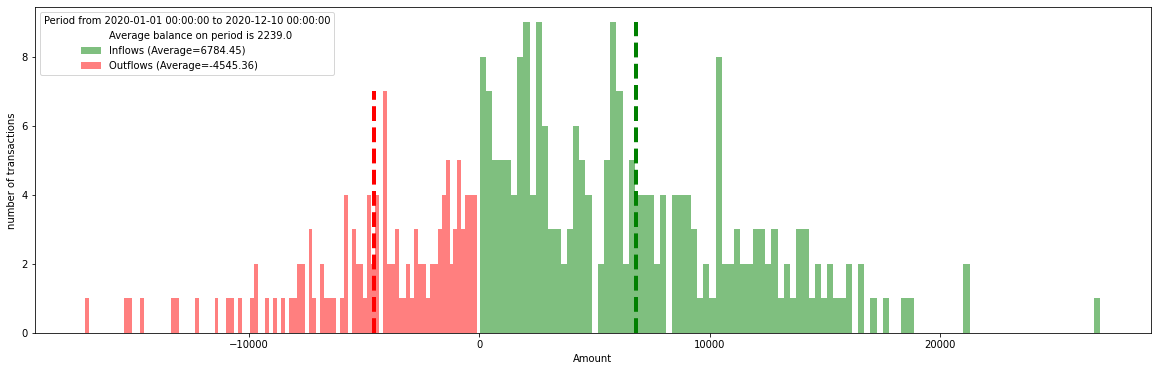

In [17]:
plot1(resam="D",startdate="2020-01-01",enddate="2020-12-31")

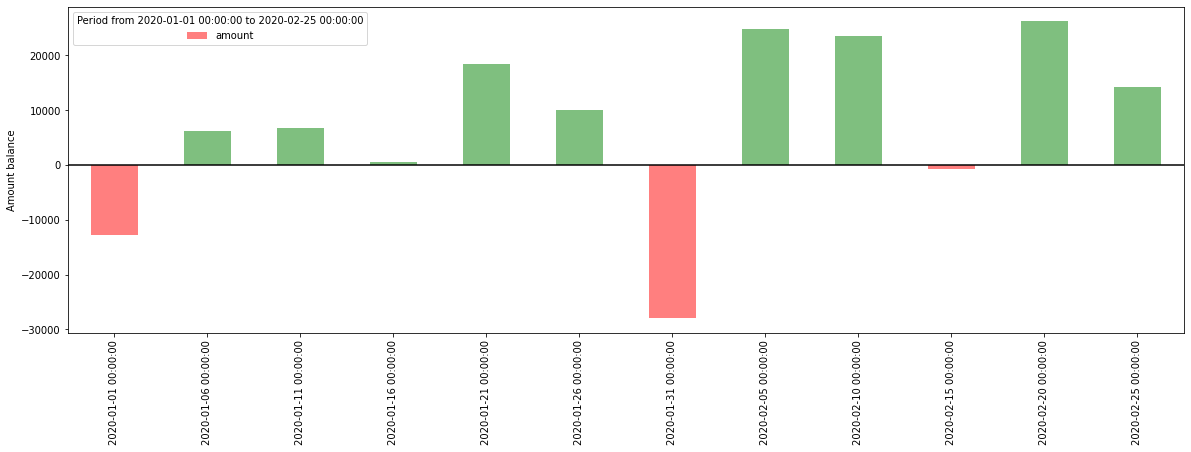

In [18]:
plot2(resam="5D",startdate="2020-01-01",enddate="2020-02-27",kind="B")

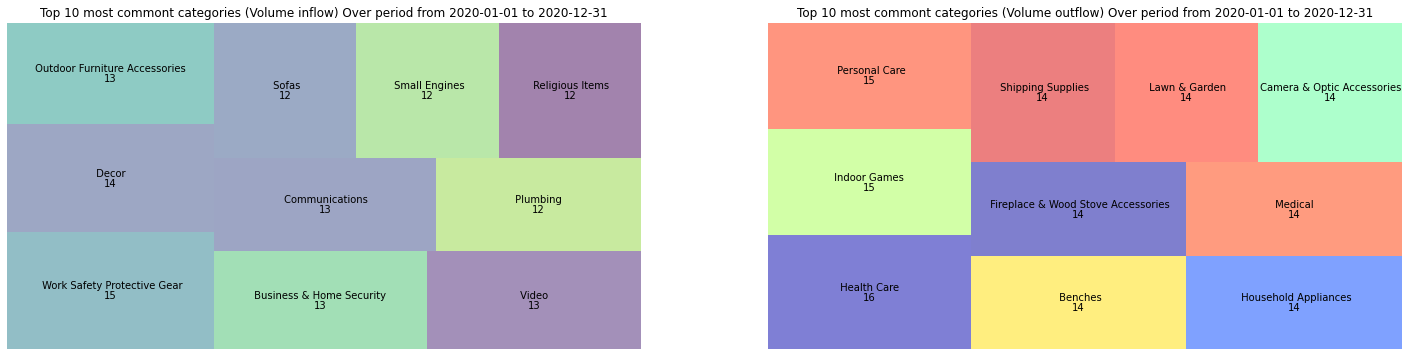

In [19]:
plot3(startdate="2020-01-01",enddate="2020-12-31")

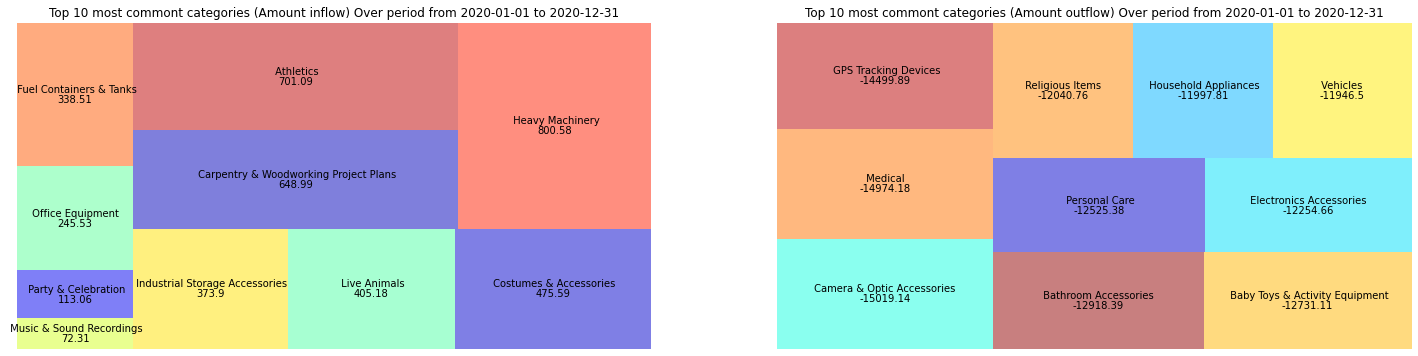

In [20]:
plot4(startdate="2020-01-01",enddate="2020-12-31")

In [21]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import branca
import branca.colormap as cm
from mpl_toolkits.basemap import Basemap
#from folium.plugins import BeautifyIcon
from folium.features import DivIcon
from pyvirtualdisplay import Display 
from selenium import webdriver

In [22]:
def plot5(startdate="2020-01-01",enddate="2020-12-31",company="company1"):
    data=data_sim[["amount","lat","lon"]]
    data=data_sim[(data_sim.index>=startdate)&(data_sim.index<=enddate)]
    
    #data=data.resample(resam).sum()
    data_p=data[data["amount"]>0]
    data_p=data_p.sort_values(by="amount")
    data_n=data[data["amount"]<0]
    data_n=data_n.sort_values(by="amount")
    locations_p = data_p[['lat', 'lon']]
    locationlist_p = locations_p.values.tolist()
    locations_n = data_n[['lat', 'lon']]
    locationlist_n = locations_n.values.tolist()
    locations = data[['lat', 'lon']]
    locationlist = locations.values.tolist()
    
    lat,lon=dict_lat.get(dict_names.get(company)), dict_lon.get(dict_names.get(company))
    locations_company = [lat, lon]
    locationlist_company = list(locations_company)
    
    map = folium.Map(width=800,height=800,location=[locations_p["lat"].mean()+0.015, locations_p["lon"].mean()-0.01], zoom_start=8)#,

    folium.CircleMarker(locationlist_company,weight=5,radius=3,color="blue",alpha=0.9,popup="Company").add_to(map)
    folium.Marker(locationlist_company, icon=DivIcon(icon_size=(150,36), icon_anchor=(0,30), html='<div style="font-size: 15pt; color:blue">{}</div>'.format(str(company)))).add_to(map)
        
    for point1, name1 in enumerate(data_p["amount"][0:20]):
        folium.CircleMarker(locationlist_p[point1],weight=4,radius=2,color="green",alpha=0.9,popup=data_p["amount"][point1]).add_to(map)
        folium.Marker(locationlist_p[point1], icon=DivIcon(icon_size=(150,36), icon_anchor=(0,30), html='<div style="font-size: 12pt; color:black">{}</div>'.format(np.round(name1,2)))).add_to(map)
    for point2, name2 in enumerate(data_n["amount"][0:20]):
        folium.CircleMarker(locationlist_n[point2],weight=4,radius=2,color="red",alpha=0.9,popup=data_n["amount"][point2]).add_to(map)
        folium.Marker(locationlist_n[point2], icon=DivIcon(icon_size=(150,36), icon_anchor=(0,30), html='<div style="font-size: 12pt; color:black">{}</div>'.format(np.round(name2,2)))).add_to(map)
    fn1='company.html'
    map.save(fn1)
    return map

In [23]:
plot5(startdate="2020-01-01",enddate="2020-01-15",company="company2")

**For example***: one could now know the financial performance of company 1 with respect to the total financial performance of all companies.

In [24]:
def plot11(resam="D",startdate="2020-01-01",enddate="2020-12-31",company="company1"):
    data=data_sim[["amount"]]
    data=data[(data.index>=startdate)&(data.index<=enddate)]
    data=data.resample(resam).sum()

    data2=data_sim[data_sim["Name"]==company][["amount"]]
    data2=data2[(data2.index>=startdate)&(data2.index<=enddate)]
    data2=data2.resample(resam).sum()

    plt.figure(figsize=(20,6))
    bins=100
    inf=plt.hist(data[data["amount"]>0]["amount"],bins=bins,color='g',alpha=0.5,label="Inflows (Average={})".format(np.round(data[data["amount"]>0]["amount"].mean(),2)))
    plt.vlines(data[data["amount"]>0]["amount"].mean(),inf[0].min(),inf[0].max(),color='g',linestyle='--',lw=4)
    plt.vlines(data2[data2["amount"]>0]["amount"].mean(),inf[0].min(),inf[0].max(),color='g',linestyle='-',lw=6)
    out=plt.hist(data[data["amount"]<0]["amount"],bins=bins,color='r',alpha=0.5,label="Outflows (Average={})".format(np.round(data[data["amount"]<0]["amount"].mean(),2)))
    plt.vlines(data[data["amount"]<0]["amount"].mean(),out[0].min(),out[0].max(),color='r',linestyle='--',lw=4)
    plt.vlines(data2[data2["amount"]<0]["amount"].mean(),out[0].min(),out[0].max(),color='r',linestyle='-',lw=6)
    plt.plot([], [], ' ', label="Average balance on period is {}".format(np.round(data[data["amount"]>0]["amount"].mean()+data[data["amount"]<0]["amount"].mean(),2)))
    
    plt.plot([], [], ' ', label="Average balance on period is {} ({})".format(np.round(data2[data2["amount"]>0]["amount"].mean()+data2[data2["amount"]<0]["amount"].mean(),2),company))
    
    plt.xlabel("Amount")
    plt.ylabel("number of transactions")
    plt.legend(title="Period from {} to {}".format(data.index.min(),data.index.max()),ncol=1,loc=2)
    return plt.show()

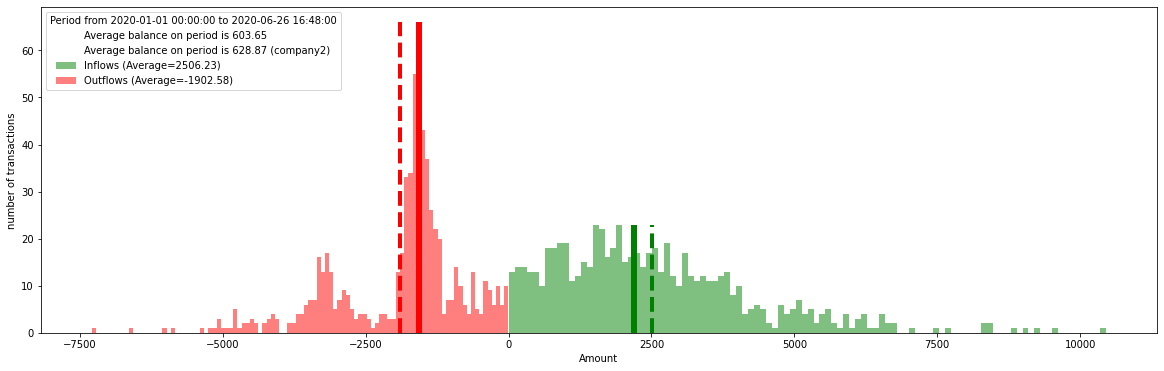

In [25]:
plot11(resam="0.1D",startdate="2020-01-01",enddate="2020-06-27",company="company2")

In [26]:
data_sim

,amount,category,category_id,authorized_date,lat,lon,city,postal_code,region,country,Name,Contrator_city,Contrator_lat,Contrator_lon,Zipcode,Company_Type,Contractor_type
date,,,,,,,,,,,,,,,,,
2020-01-01 00:05:18,961.148015,Vehicles,19013134,2020-01-02 23:41:47.434369,39.483762,-101.030409,Utica,67584,KS,US,company6,Minneapolis,44.9778,-93.2650,67467,general_contractor,painting
2020-01-01 00:46:06,-1518.251036,Personal Care,19013281,2020-01-03 00:22:35.434369,39.793762,-101.140409,Republic,66964,KS,US,company1,Shawnee Mission,39.0228,-94.7152,66286,sub_contractor,roofing
2020-01-01 06:48:59,-1608.179582,Baby Toys & Activity Equipment,19013226,2020-01-03 06:25:28.434369,39.003762,-94.980409,Topeka,66699,KS,US,company4,Rock,39.3722,-104.8561,67131,sub_contractor,drywall
2020-01-01 10:58:46,-1740.425926,Outdoor Play Equipment,19013016,2020-01-03 10:35:15.434369,37.083762,-96.900409,Minneola,67865,KS,US,company1,Shawnee Mission,39.0228,-94.7152,66286,sub_contractor,other_non_tech
2020-01-01 13:20:36,-1669.534516,Fencing & Barriers,19013248,2020-01-03 12:57:05.434369,38.593762,-95.860409,Opolis,66760,KS,US,company1,Shawnee Mission,39.0228,-94.7152,66286,sub_contractor,framing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10 11:14:56,-1325.616737,Shoe Accessories,19013089,2020-12-12 10:51:25.434369,39.233762,-96.130409,Wallace,67761,KS,US,company2,Bazine,38.4445,-99.6921,67516,general_contractor,excavation
2020-12-10 11:19:33,947.949137,Household Appliance Accessories,19013113,2020-12-12 10:56:02.434369,39.043762,-95.430409,Esbon,66941,KS,US,company1,Shawnee Mission,39.0228,-94.7152,66286,sub_contractor,drywall
2020-12-10 13:06:12,2486.986811,Indoor Games,19013004,2020-12-12 12:42:41.434369,37.773762,-98.780409,Wichita,67278,KS,US,company1,Shawnee Mission,39.0228,-94.7152,66286,sub_contractor,painting


In [27]:
a1 = data_sim[data_sim["amount"]>0].groupby('Name')[['amount']].mean().index.get_level_values(0)#.tolist()
d1 = data_sim[data_sim["amount"]>0].groupby('Name')[['amount']].mean().reset_index().amount.values#.tolist()
cats1=pd.DataFrame(np.array([a1,d1]).T)
a2 = data_sim[data_sim["amount"]<0].groupby('Name')[['amount']].mean().index.get_level_values(0)#.tolist()
d2 = data_sim[data_sim["amount"]<0].groupby('Name')[['amount']].mean().reset_index().amount.values#.tolist()
cats2=pd.DataFrame(np.array([a2,d2]).T)

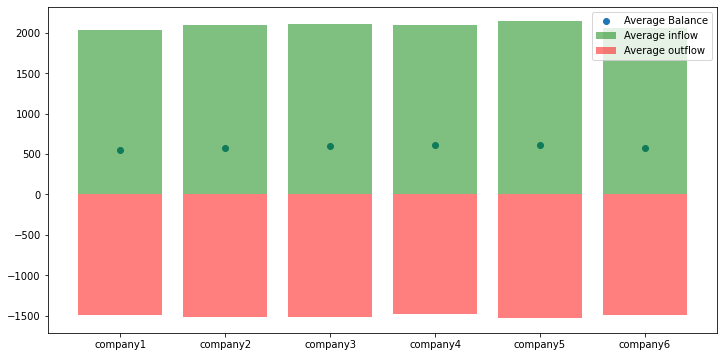

In [28]:
plt.figure(figsize=(12,6))
plt.bar(cats1[0],cats1[1],color='green',alpha=0.5,label="Average inflow")
plt.bar(cats2[0],cats2[1],color='red',alpha=0.5,label="Average outflow")
plt.scatter(cats1[0],cats1[1]+cats2[1],label="Average Balance")
plt.legend()
plt.show()

In [29]:
source = np.random.choice(name, size=100)
target = np.random.choice(categories_uniques[30:40], size=100)
value = np.random.randint(100,1000,100)

In [30]:
from pySankey.sankey import sankey

In [31]:
data=pd.DataFrame(np.array([source,target]).T,columns=["company", "cat"])

In [32]:
data

,company,cat
0,company4,Shopping Totes
1,company4,Speed Radars
2,company2,Outdoor Play Equipment
3,company1,Speed Radars
4,company2,Chairs
...,...,...
95,company6,Suitcases
96,company6,Building Consumables
97,company5,Suitcases
98,company3,Networking


<Figure size 720x360 with 0 Axes>

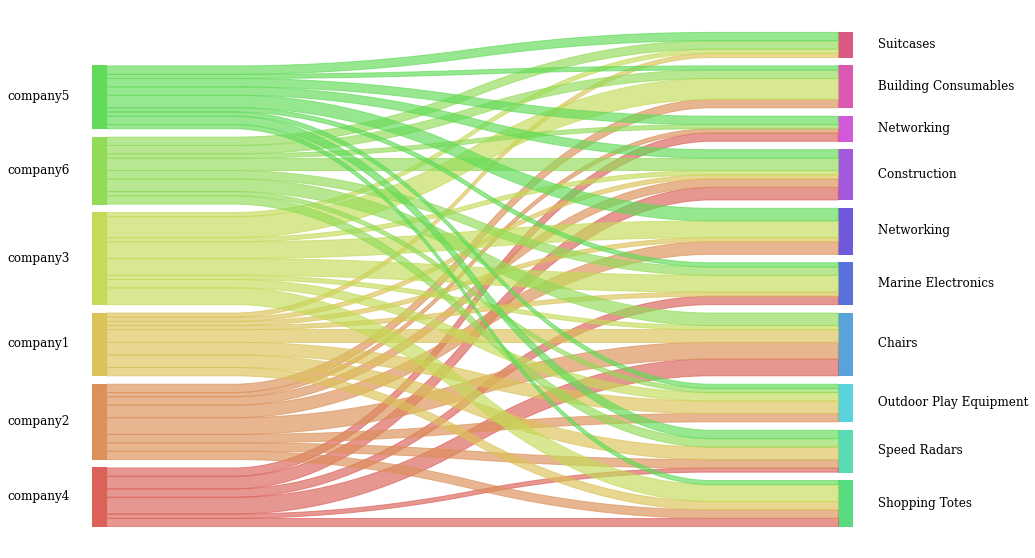

In [33]:
plt.figure(figsize=(10,5))
sankey(data["company"], data["cat"], aspect=50, fontsize=12)
# Get current figure
fig = plt.gcf()
# Set size in inches
fig.set_size_inches(15, 10)
# Set the color of the background to white
fig.set_facecolor("w")
plt.show()